<a href="https://colab.research.google.com/github/zhanna-naumenko/Hackathon-3/blob/main/Hackathon3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**COVID-19 All Vaccines Tweets**

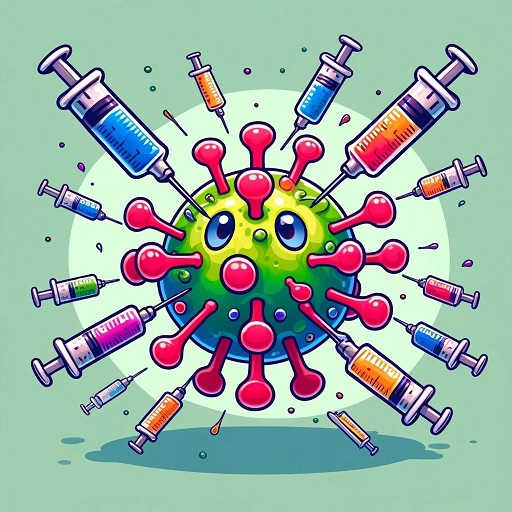

In [ ]:
!pip install kaggle

# Upload kaggle.json file (Run this cell and select your kaggle.json file through the file picker)
from google.colab import files
uploaded = files.upload()

# Make directory named kaggle and copy kaggle.json file there
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/

# Change the permissions of the file
!chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


In [ ]:
!kaggle datasets download -d gpreda/all-covid19-vaccines-tweets

Dataset URL: https://www.kaggle.com/datasets/gpreda/all-covid19-vaccines-tweets
License(s): CC0-1.0
 90% 27.0M/29.9M [00:02<00:00, 15.9MB/s]
100% 29.9M/29.9M [00:02<00:00, 13.1MB/s]


In [ ]:
!unzip all-covid19-vaccines-tweets.zip

Archive:  all-covid19-vaccines-tweets.zip
  inflating: vaccination_all_tweets.csv  


In [ ]:
!pip install spacy

In [ ]:
!pip install wordcloud matplotlib pandas

In [ ]:
from IPython.display import display, Javascript

# Set the data rate limit to a higher value
# The value is in bytes per second, adjust as needed
display(Javascript('''
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}
'''))

<IPython.core.display.Javascript object>

In [ ]:
import nltk
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('maxent_ne_chunker')
nltk.download('averaged_perceptron_tagger')
nltk.download('words')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


True

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

covid_data = pd.read_csv('vaccination_all_tweets.csv')
covid_data.head()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False
1,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,While the world has been on the wrong side of ...,NaN,Twitter Web App,1,1,False
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False
3,1337855739918835717,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12 20:23:59,"Facts are immutable, Senator, even when you're...",NaN,Twitter Web App,446,2129,False
4,1337854064604966912,Citizen News Channel,NaN,Citizen News Channel bringing you an alternati...,2020-04-23 17:58:42,152,580,1473,False,2020-12-12 20:17:19,Explain to me again why we need a vaccine @Bor...,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,False


In [ ]:
covid_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228207 entries, 0 to 228206
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                228207 non-null  int64 
 1   user_name         228205 non-null  object
 2   user_location     161296 non-null  object
 3   user_description  211184 non-null  object
 4   user_created      228207 non-null  object
 5   user_followers    228207 non-null  int64 
 6   user_friends      228207 non-null  int64 
 7   user_favourites   228207 non-null  int64 
 8   user_verified     228207 non-null  bool  
 9   date              228207 non-null  object
 10  text              228207 non-null  object
 11  hashtags          178504 non-null  object
 12  source            228088 non-null  object
 13  retweets          228207 non-null  int64 
 14  favorites         228207 non-null  int64 
 15  is_retweet        228207 non-null  bool  
dtypes: bool(2), int64(6), object(8)
memory

In [ ]:
covid_data.describe()

,id,user_followers,user_friends,user_favourites,retweets,favorites
count,2.282070e+05,2.282070e+05,228207.000000,2.282070e+05,228207.000000,228207.000000
mean,1.407541e+18,9.605393e+04,986.736204,1.210417e+04,2.489284,10.819020
std,2.908485e+16,8.389053e+05,5293.500468,3.908233e+04,51.079821,199.527693
min,1.337728e+18,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000
25%,1.381940e+18,5.500000e+01,27.000000,5.700000e+01,0.000000,0.000000
50%,1.408133e+18,3.280000e+02,229.000000,9.960000e+02,0.000000,0.000000
75%,1.428688e+18,1.521000e+03,794.000000,7.300000e+03,1.000000,2.000000
max,1.463251e+18,1.635305e+07,582461.000000,1.299600e+06,12294.000000,54017.000000


In [ ]:
covid_data.isnull().sum()

id                      0
user_name               2
user_location       66911
user_description    17023
user_created            0
user_followers          0
user_friends            0
user_favourites         0
user_verified           0
date                    0
text                    0
hashtags            49703
source                119
retweets                0
favorites               0
is_retweet              0
dtype: int64

In [ ]:
# checking the number of duplicates
print(f'Number of duplicates: {covid_data.duplicated().sum()}')
print(f'Columns: {covid_data.columns}')

Number of duplicates: 0
Columns: Index(['id', 'user_name', 'user_location', 'user_description', 'user_created',
       'user_followers', 'user_friends', 'user_favourites', 'user_verified',
       'date', 'text', 'hashtags', 'source', 'retweets', 'favorites',
       'is_retweet'],
      dtype='object')


We checked for duplicates excluding the 'id' column and found two duplicates. We've decided to drop the 'id' column and remove these duplicates.

In [ ]:
covid_data.duplicated(subset=['user_name', 'user_location', 'user_description', 'user_created',
       'user_followers', 'user_friends', 'user_favourites', 'user_verified',
       'date', 'text', 'hashtags', 'source', 'retweets', 'favorites',
       'is_retweet'])[covid_data.duplicated(subset=['user_name', 'user_location', 'user_description', 'user_created',
       'user_followers', 'user_friends', 'user_favourites', 'user_verified',
       'date', 'text', 'hashtags', 'source', 'retweets', 'favorites',
       'is_retweet']) == True]

103016    True
112077    True
dtype: bool

In [ ]:
# dropping the id column
covid_data.drop('id', axis=1, inplace=True)

In [ ]:
# checking the number of duplicates
covid_data.duplicated().sum()

2

In [ ]:
# dropping the duplicates
covid_data.drop_duplicates(inplace=True)

In [ ]:
# converting dates from object to datetime
covid_data['user_created'] = pd.to_datetime(covid_data['user_created'])
covid_data['date'] = pd.to_datetime(covid_data['date'])

In [ ]:
covid_data['days_user_on_twitter'] = (covid_data['date'] - covid_data['user_created']).dt.days

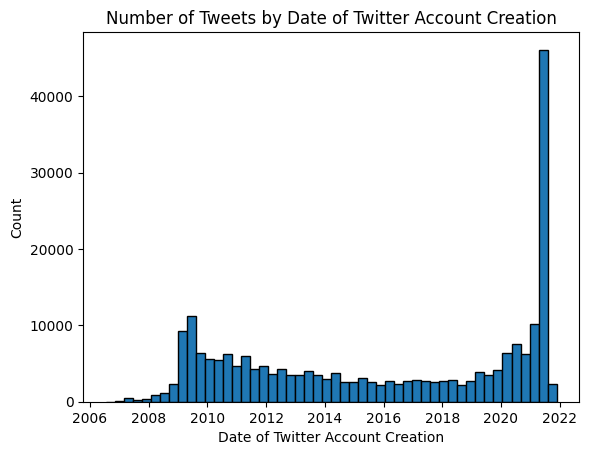

In [ ]:
# distribution of tweets by Twitter account creation
plt.hist(covid_data['user_created'], bins=50, edgecolor='black')

plt.title('Number of Tweets by Date of Twitter Account Creation')
plt.xlabel('Date of Twitter Account Creation')
plt.ylabel('Count')

# Show plot
plt.show()

A lot of tweets in the dataframe were from accounts that have been created in 2021

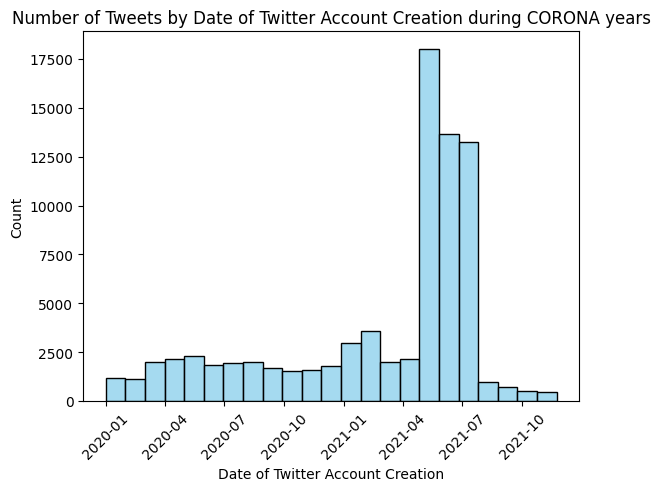

In [ ]:
# distribution of tweets by Twitter account creation during CORONA years
sns.histplot(covid_data.loc[covid_data.user_created > '2020']['user_created'], bins=23, color='skyblue')
plt.xticks(rotation=45)
plt.title('Number of Tweets by Date of Twitter Account Creation during CORONA years')
plt.xlabel('Date of Twitter Account Creation')
plt.ylabel('Count')

# Show plot
plt.show()

A lot of tweets in the dataframe were from accounts that have been created in May, June and July 2021

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129417 (\N{OWL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


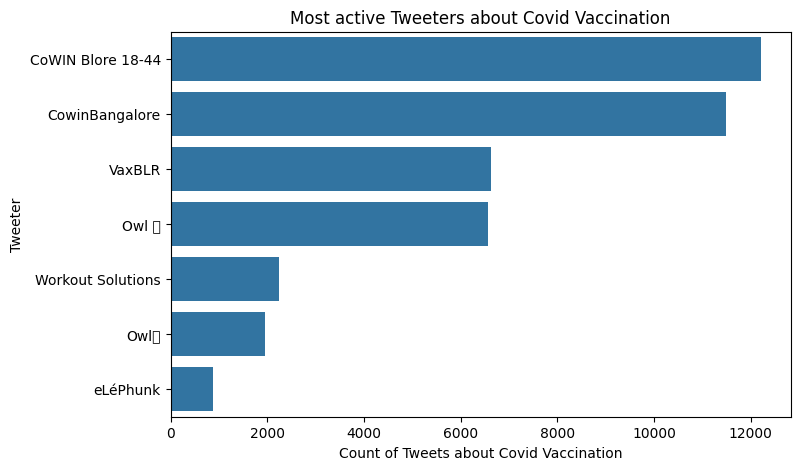

In [ ]:
user_name_counts = covid_data['user_name'].value_counts()
# Extract the categories sorted by count
order = user_name_counts.index[:7]

plt.figure(figsize=(8, 5))
# Create the count plot with ordered horizontal bars
sns.countplot(data=covid_data, y='user_name', order=order)

# Set the title, x-label, and y-label
plt.title('Most active Tweeters about Covid Vaccination')
plt.xlabel('Count of Tweets about Covid Vaccination')
plt.ylabel('Tweeter')

# Show the plot
plt.show()

The four most active tweeters about COVID-19 vaccination were all form healthcare providers in India that used Twitter to send updates about available time slots for vaccination. This also applies to the sixth account. All these account were created in May and June of 2021, explaining the high counts of 'user_created' around these months.

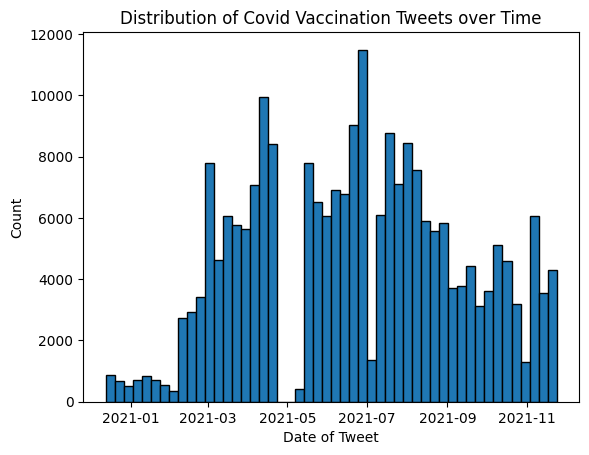

In [ ]:
# distribution of the COVID Vaccination Tweets over Time period
plt.hist(covid_data['date'], bins=50, edgecolor='black')

plt.title('Distribution of Covid Vaccination Tweets over Time')
plt.xlabel('Date of Tweet')
plt.ylabel('Count')

# Show plot
plt.show()

Why was there a gap around the end of April and the beginning of May? Let's see a line chart for each day.

In [ ]:
daily_tweets_count = covid_data.groupby(pd.Grouper(key = 'date', freq = 'D')).size()
daily_retweets_count = covid_data.groupby(pd.Grouper(key = 'date', freq = 'D'))['retweets'].sum()

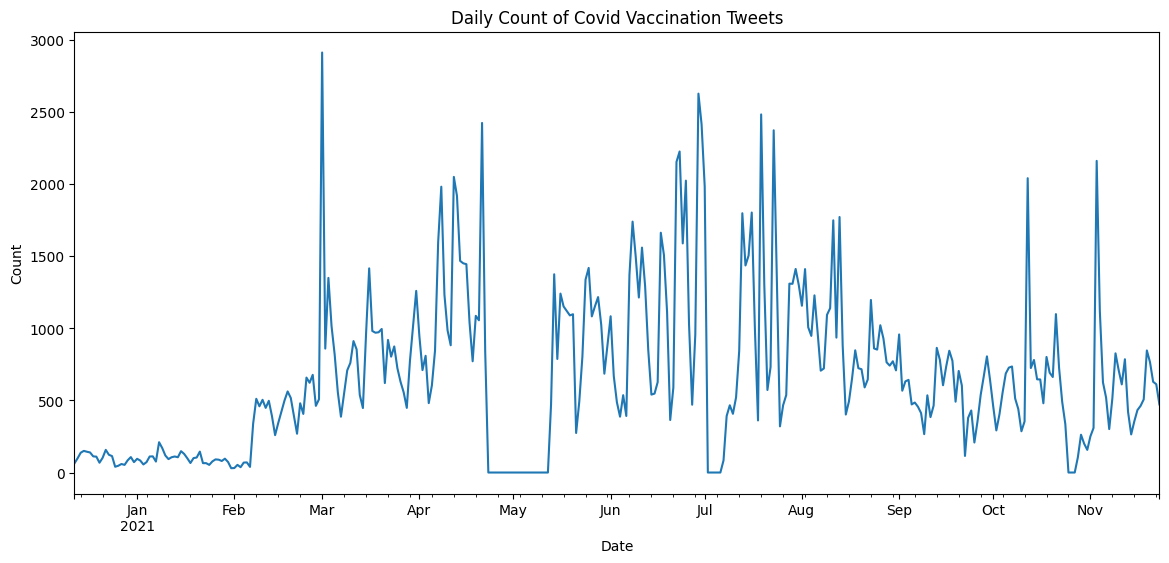

In [ ]:
# Daily Count of Covid Vaccination Tweets
daily_tweets_count.plot(kind='line', figsize=(14, 6))
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Daily Count of Covid Vaccination Tweets')
plt.show()

It seems that the daily data collection was interrupted on certain days in April, May, July and October.

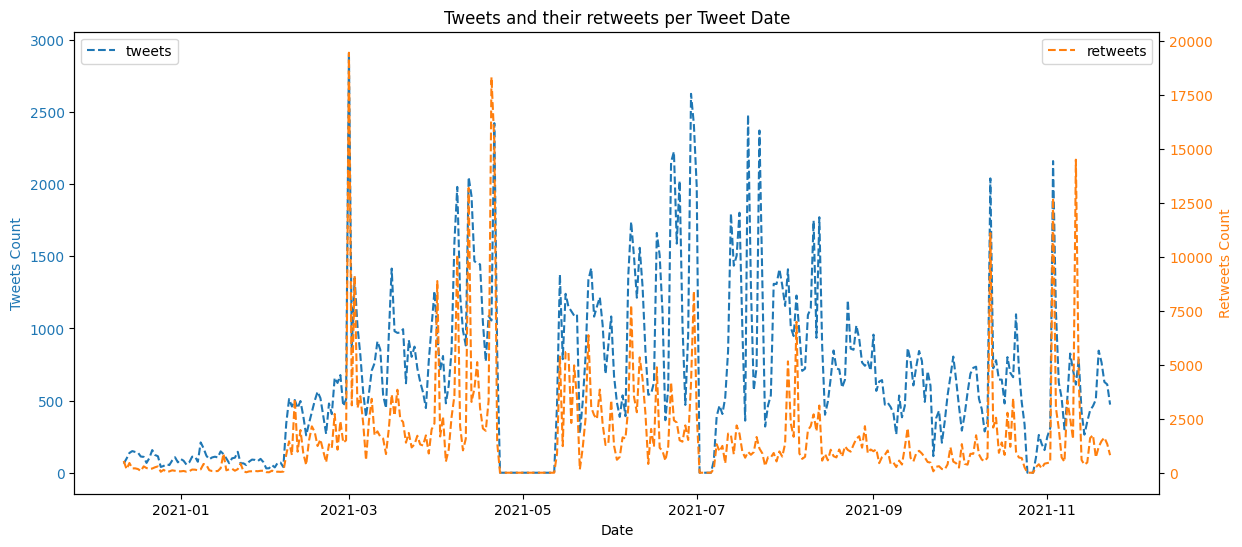

In [ ]:
fig, ax1 = plt.subplots(figsize = (14, 6))

# Plot the first series on the primary y-axis
tweets_color = 'tab:blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('Tweets Count', color=tweets_color)
ax1.plot(daily_tweets_count.index, daily_tweets_count.values, color=tweets_color, label = 'tweets', linestyle = '--')
ax1.tick_params(axis='y', labelcolor=tweets_color)


ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
retweets_color = 'tab:orange'
ax2.set_ylabel('Retweets Count', color=retweets_color)
ax2.plot(daily_retweets_count.index, daily_retweets_count.values, color=retweets_color, label = 'retweets', linestyle = '--')
ax2.tick_params(axis='y', labelcolor=retweets_color)

ax1.legend(loc = 'upper left')
ax2.legend(loc = 'upper right')
plt.title('Tweets and their retweets per Tweet Date')


plt.show()

In [ ]:
correlation = daily_tweets_count.corr(daily_retweets_count)
print(f'The correlation between number of tweets and their number of retweets: {round(correlation, 2)}')

The correlation between number of tweets and their number of retweets: 0.65


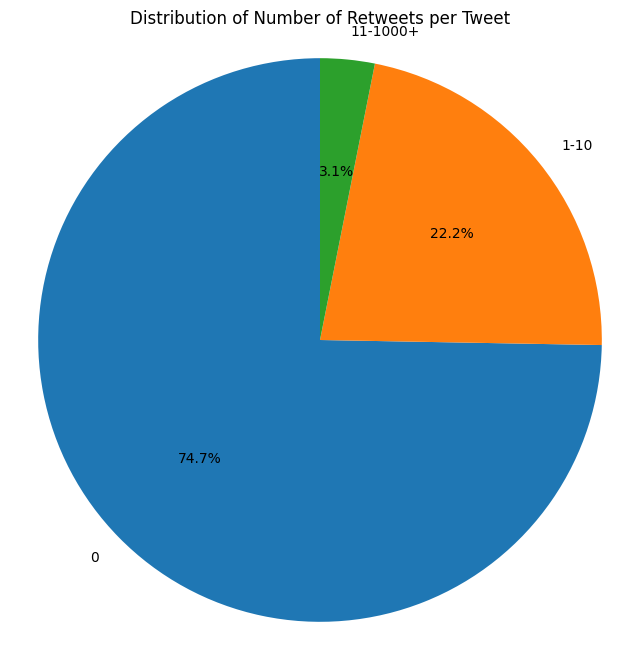

In [ ]:
# Define bins for the ranges of retweets
bins = [0, 1, 10, float('inf')]
labels = ['0','1-10', '11-1000+']

# Categorize data based on bins
retweet_categories = pd.cut(covid_data['retweets'], bins=bins, labels=labels, right=False)
category_counts = retweet_categories.value_counts(sort=False)

# Create pie chart
plt.figure(figsize=(8, 8))  # Adjust size as needed
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Number of Retweets per Tweet')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Show plot
plt.show()

In [ ]:
# make a copy of the dataset to drop some rows
covid_data_copy = covid_data.copy()

In [ ]:
# checking how many null values is in column user_name
covid_data_copy['user_name'].isnull().sum()

2

In [ ]:
# checking how many null values is in column user_description
covid_data_copy['user_description'].isnull().sum()

17023

In [ ]:
# deleting the null values from the column user_name
covid_data_copy.dropna(subset=['user_name'], inplace=True)
# deleting the null values from the column user_description
covid_data_copy.dropna(subset=['user_description'], inplace=True)

In [ ]:
# checking how many null values is in column user_name
covid_data_copy['user_name'].isnull().sum()
# checking how many null values is in column user_description
covid_data_copy['user_description'].isnull().sum()

0

In [ ]:
# making a list of values from the column user_name
list_of_user_names = covid_data_copy['user_name'].tolist()
print(list_of_user_names[0:10])
# making a list of values from the column user_description
list_of_user_description = covid_data_copy['user_description'].tolist()
print(list_of_user_description[0:10])

['Rachel Roh', 'Albert Fong', 'eli🇱🇹🇪🇺👌', 'Charles Adler', 'Citizen News Channel', 'Dee', 'Gunther Fehlinger', 'Dr.Krutika Kuppalli', 'Erin Despas', 'Ch.Amjad Ali']
["Aggregator of Asian American news; scanning diverse sources 24/7/365. RT's, Follows and 'Likes' will fuel me 👩\u200d💻", "Marketing dude, tech geek, heavy metal & '80s music junkie. Fascinated by meteorology and all things in the cloud. Opinions are my own.", 'heil, hydra 🖐☺', 'Hosting "CharlesAdlerTonight" Global News Radio Network. Weeknights 7 Pacific-10 Eastern - Email comments/ideas to charles@charlesadlertonight.ca', "Citizen News Channel bringing you an alternative news source from citizen journalists that haven't sold out. Real news & real views", 'Gastroenterology trainee, Clinical Research Fellow in IBD, mother to human and fur baby, Canadian in Britain', 'End North Stream 2 now - the pipeline of corruption, funding Russias war against Ukraine,Georgia, Syria and political intervention in USA and EU must be stoppe

In [ ]:
print(f"Number of values user_name: {len(list_of_user_names)}")
print(f"Number of values user_description: {len(list_of_user_description)}")

Number of values user_name: 211180
Number of values user_description: 211180


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans


# Vectorize the text data
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(covid_data_copy['user_name'], covid_data_copy['user_description'])

# Perform K-means clustering
kmeans = KMeans(n_clusters=2, random_state=22)
kmeans.fit(X)

# Assign labels
labels = kmeans.labels_

# Map cluster labels to 'Organization' or 'Person'
label_map = {0: 'Organization', 1: 'Person'}
cluster_labels = [label_map[label] for label in labels]

# Create a new column with cluster labels
covid_data_copy['user_category'] = cluster_labels

# Display the dataframe with the new column
print(covid_data_copy[['user_name', 'user_category']])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


                   user_name user_category
0                 Rachel Roh        Person
1                Albert Fong        Person
2                   eli🇱🇹🇪🇺👌        Person
3              Charles Adler        Person
4       Citizen News Channel        Person
...                      ...           ...
228202                VaxBLR        Person
228203                VaxBLR        Person
228204                VaxBLR        Person
228205      Gatti Valentino🐾        Person
228206                VaxBLR        Person

[211180 rows x 2 columns]


<ipython-input-27-d560594d9b14>:6: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_dense[labels == label, 0], X_dense[labels == label, 1], label=label,


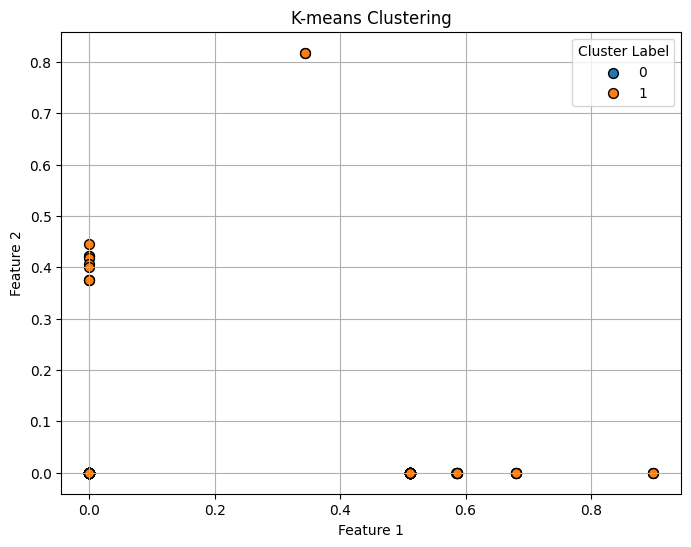

In [ ]:
X_dense = X.toarray()

# Scatter plot
plt.figure(figsize=(8, 6))
for label in np.unique(labels):
    plt.scatter(X_dense[labels == label, 0], X_dense[labels == label, 1], label=label,
                cmap='viridis', marker='o', edgecolor='black', s=50)
plt.title('K-means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(title='Cluster Label')
plt.grid(True)
plt.show()

In [ ]:
print(covid_data_copy['user_category'].value_counts())

user_category
Person          208527
Organization      2653
Name: count, dtype: int64


In [ ]:
from sklearn.metrics import silhouette_score

# Calculate silhouette score
silhouette_avg = silhouette_score(X, labels)
print("Silhouette Score:", silhouette_avg)
inertia = kmeans.inertia_
print("Inertia:", inertia)

Silhouette Score: 0.02519951772162765
Inertia: 204196.36020457413


In [ ]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string
import re
import spacy
import itertools

# list of emoji
emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags=re.UNICODE)

# function that cleans the text
def cleaning_data(text):
    lemmatizer = WordNetLemmatizer()
    preprocessed_data = []
    email_pattern = r'\b[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Z|a-z]{2,}\b'
    for tweet in text:
      tweet = str(tweet)
      tweet = tweet.lower()
      tweet = tweet.replace("#", "")
      tweet = tweet.replace("@", "")
      tweet = re.sub(r'http\S+', '', tweet)
      tweet = re.sub(email_pattern, '', tweet)
      tweet = emoji_pattern.sub(r'', tweet)
      tokens = word_tokenize(tweet)
      tokens = [' '.join(word for word in tokens if word not in string.punctuation)]
      tokens = [lemmatizer.lemmatize(word) for word in tokens]
      preprocessed_data.append(tokens)
    return preprocessed_data

covid_preprocessed_user_name = cleaning_data(list_of_user_names)
covid_preprocessed_user_name = list(itertools.chain(*covid_preprocessed_user_name))

covid_preprocessed_description = cleaning_data(list_of_user_description)
covid_preprocessed_description = list(itertools.chain(*covid_preprocessed_description))

covid_data_copy['new_user_name'] = covid_preprocessed_user_name
covid_data_copy['new_user_description'] = covid_preprocessed_description

covid_data_copy.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet,days_user_on_twitter,user_category,new_user_name,new_user_description
0,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False,4273,Person,rachel roh,aggregator of asian american news scanning div...
1,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,While the world has been on the wrong side of ...,NaN,Twitter Web App,1,1,False,4101,Person,albert fong,marketing dude tech geek heavy metal '80s musi...
2,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False,169,Person,eli,heil hydra ☺
3,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12 20:23:59,"Facts are immutable, Senator, even when you're...",NaN,Twitter Web App,446,2129,False,4476,Person,charles adler,hosting `` charlesadlertonight '' global news ...
4,Citizen News Channel,NaN,Citizen News Channel bringing you an alternati...,2020-04-23 17:58:42,152,580,1473,False,2020-12-12 20:17:19,Explain to me again why we need a vaccine @Bor...,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,False,233,Person,citizen news channel,citizen news channel bringing you an alternati...


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

# Vectorize the text data
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(covid_data_copy['new_user_name'], covid_data_copy['new_user_description'])

# Perform K-means clustering
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X)

# Assign labels
labels = kmeans.labels_

# Map cluster labels to 'Organization' or 'Person'
label_map = {0: 'Organization', 1: 'Person'}
cluster_labels = [label_map[label] for label in labels]

# Create a new column with cluster labels
covid_data_copy['new_user_category'] = cluster_labels

# Display the dataframe with the new column
print(covid_data_copy[['new_user_name', 'new_user_category']])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


               new_user_name new_user_category
0                 rachel roh            Person
1                albert fong            Person
2                        eli            Person
3              charles adler            Person
4       citizen news channel            Person
...                      ...               ...
228202                vaxblr            Person
228203                vaxblr            Person
228204                vaxblr            Person
228205       gatti valentino            Person
228206                vaxblr            Person

[211180 rows x 2 columns]


In [ ]:
print(covid_data_copy['new_user_category'].value_counts())

new_user_category
Person          198970
Organization     12210
Name: count, dtype: int64


<ipython-input-32-d560594d9b14>:6: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_dense[labels == label, 0], X_dense[labels == label, 1], label=label,


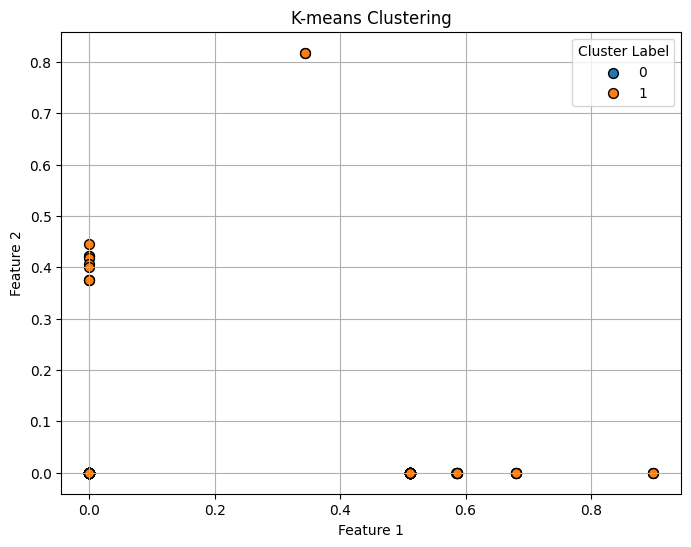

In [ ]:
X_dense = X.toarray()

# Scatter plot
plt.figure(figsize=(8, 6))
for label in np.unique(labels):
    plt.scatter(X_dense[labels == label, 0], X_dense[labels == label, 1], label=label,
                cmap='viridis', marker='o', edgecolor='black', s=50)
plt.title('K-means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(title='Cluster Label')
plt.grid(True)
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score

# Calculate silhouette score
silhouette_avg = silhouette_score(X, labels)
print("Silhouette Score:", silhouette_avg)
inertia = kmeans.inertia_
print("Inertia:", inertia)

Silhouette Score: 0.06752233278115634
Inertia: 195236.65261161685


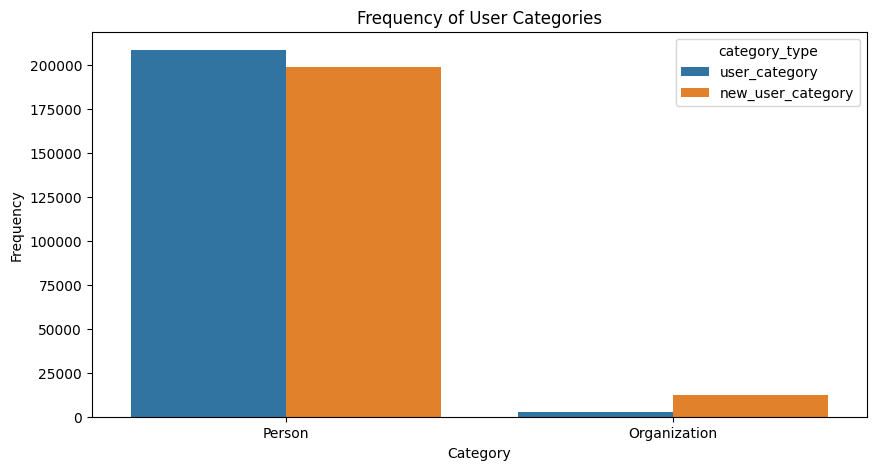

In [ ]:
import seaborn as sns

# Compute frequency counts
user_category_counts = covid_data_copy['user_category'].value_counts()
new_user_category_counts = covid_data_copy['new_user_category'].value_counts()

# Create a DataFrame for plotting
counts = pd.DataFrame({'user_category': user_category_counts,
                       'new_user_category': new_user_category_counts})

# Prepare data for seaborn
counts_sns = counts.reset_index().melt(id_vars='index', var_name='category_type', value_name='count')
counts_sns.rename(columns={'index': 'category'}, inplace=True)

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(x='category', y='count', hue='category_type', data=counts_sns)
plt.title('Frequency of User Categories')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.show()

We conducted vectorizing analysis using TF-IDF, followed by the application of K-means to categorize usernames and user descriptions into clusters. In one case, we performed the analysis without cleaning the data, while in the other case, we applied data cleaning techniques, resulting in a different Silhouette Score. In the first case, the score was 0.025, whereas in the second case, it improved to 0.067. Although there were some improvements, the score is still relatively low to consider the data reliable. Therefore, we decided to explore alternative methods.


In [ ]:
from nltk.tokenize import word_tokenize
from nltk import pos_tag

# Function to perform NER tagging using nltk.ne_chunk
def ner_tagging(text):
    tokens = word_tokenize(text)
    tagged = nltk.pos_tag(tokens)
    ne_tagged = nltk.ne_chunk(tagged)
    entities = [entity.label() for entity in ne_tagged if hasattr(entity, 'label')]
    return entities

# Apply NER tagging to the 'user_name' column
covid_data_copy['user_name_ner'] = covid_data_copy['new_user_name'].apply(ner_tagging)

# Function to simplify NER results
def simplify_ner_tags(tags):
    if 'PERSON' in tags:
        return 'Person'
    elif 'ORGANIZATION' in tags:
        return 'Organization'
    elif 'GPE' in tags:
        return 'Person'  # Assuming 'GPE' should be treated as 'Person' for simplicity
    elif 'GSP' in tags:
        return 'Organization'  # Assuming 'GSP' should be treated as 'Organization'
    return ''  # Return empty string for other cases or empty lists

# Apply simplification function to 'user_name_ner'
covid_data_copy['user_name_ner'] = covid_data_copy['user_name_ner'].apply(simplify_ner_tags)

# Display the dataframe with the new column
print(covid_data_copy[['new_user_name', 'user_name_ner']])

               new_user_name user_name_ner
0                 rachel roh              
1                albert fong              
2                        eli              
3              charles adler              
4       citizen news channel              
...                      ...           ...
228202                vaxblr              
228203                vaxblr              
228204                vaxblr              
228205       gatti valentino              
228206                vaxblr              

[211180 rows x 2 columns]


In [ ]:
# checking the number of each value after NER tagging
print(covid_data_copy['user_name_ner'].value_counts())

user_name_ner
                208582
Organization      1767
Person             831
Name: count, dtype: int64


In [ ]:
# unique values in the column NER tagging
uniq_values = covid_data_copy['user_name_ner'].unique()
print(uniq_values)

['' 'Organization' 'Person']


In [ ]:
# replacing the "" data with null values in order to drop them and make an SVC
covid_data_copy['user_name_ner'] = covid_data_copy['user_name_ner'].replace('', np.NAN)

In [ ]:
covid_data_copy['user_name_ner'].isnull().sum()

208582

In [ ]:
from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

# Assuming covid_data_copy is your DataFrame and 'user_name_ner' is the column of interest
# First, filter out rows with non-null values in 'user_name_ner' to use as training data
training_data = covid_data_copy.dropna(subset=['user_name_ner'])

# Separate features and target variable
X_train = training_data['new_user_name']
y_train = training_data['user_name_ner']

# Initialize TF-IDF vectorizer
vectorizer = TfidfVectorizer()

# Transform the text data into TF-IDF features
X_train_vect = vectorizer.fit_transform(X_train)

# Initialize SVM classifier
svm_classifier = SVC()

# Train the SVM model
svm_classifier.fit(X_train_vect, y_train)

SVC()

In [ ]:
# Extract the subset of data with null values in 'user_name_ner'
null_data = covid_data_copy[covid_data_copy['user_name_ner'].isnull()]

# Extract the features for prediction
X_null = null_data['new_user_name']

# Transform the text data into TF-IDF features using the same vectorizer
X_null_vect = vectorizer.transform(X_null)

# Predict the missing values using the trained SVM model
predicted_labels = svm_classifier.predict(X_null_vect)

# Fill in the missing values in the DataFrame
covid_data_copy.loc[covid_data_copy['user_name_ner'].isnull(), 'user_name_ner'] = predicted_labels

# Display the updated DataFrame
print(covid_data_copy[['new_user_name', 'user_name_ner']])

               new_user_name user_name_ner
0                 rachel roh  Organization
1                albert fong  Organization
2                        eli  Organization
3              charles adler  Organization
4       citizen news channel  Organization
...                      ...           ...
228202                vaxblr  Organization
228203                vaxblr  Organization
228204                vaxblr  Organization
228205       gatti valentino  Organization
228206                vaxblr  Organization

[211180 rows x 2 columns]


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(covid_data_copy['new_user_name'], covid_data_copy['user_name_ner'], test_size=0.2, random_state=42)

# Initialize TF-IDF vectorizer
vectorizer = TfidfVectorizer()

# Transform the text data into TF-IDF features
X_train_vect = vectorizer.fit_transform(X_train)
X_test_vect = vectorizer.transform(X_test)

# Initialize SVM classifier
svm_classifier = SVC()

# Train the SVM model
svm_classifier.fit(X_train_vect, y_train)

# Predict on the test set
y_pred = svm_classifier.predict(X_test_vect)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


In [ ]:
print(covid_data_copy['user_name_ner'].value_counts())

user_name_ner
Organization    209089
Person            2091
Name: count, dtype: int64


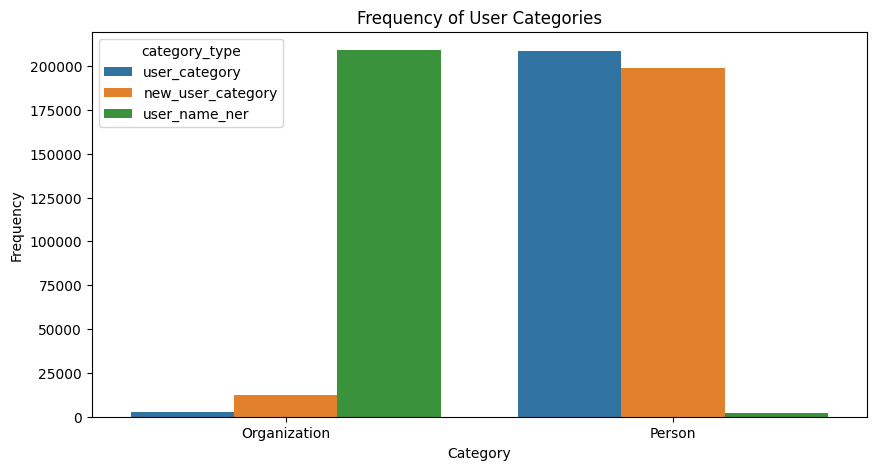

In [ ]:
import seaborn as sns

# Compute frequency counts
user_category_counts = covid_data_copy['user_category'].value_counts()
new_user_category_counts = covid_data_copy['new_user_category'].value_counts()
user_name_ner_counts = covid_data_copy['user_name_ner'].value_counts()
# Create a DataFrame for plotting
new_counts = pd.DataFrame({'user_category': user_category_counts,
                       'new_user_category': new_user_category_counts,
                       'user_name_ner': user_name_ner_counts})

# Prepare data for seaborn
counts_sns = new_counts.reset_index().melt(id_vars='index', var_name='category_type', value_name='count')
counts_sns.rename(columns={'index': 'category'}, inplace=True)

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(x='category', y='count', hue='category_type', data=counts_sns)
plt.title('Frequency of User Categories')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.show()

In [ ]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Initialize the VADER sentiment analyzer
sid = SentimentIntensityAnalyzer()

# Function to classify sentiment
def get_sentiment(text):
    # Analyze sentiment of the text
    sentiment_score = sid.polarity_scores(text)

    # Classify sentiment based on compound score
    if sentiment_score['compound'] >= 0.05:
        return 'Positive'
    elif sentiment_score['compound'] <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Apply sentiment analysis to the 'text' column
covid_data['sentiment'] = covid_data['text'].apply(get_sentiment)

# Display the dataframe with the new 'sentiment' column
print(covid_data[['text', 'sentiment']])

                                                     text sentiment
0       Same folks said daikon paste could treat a cyt...  Positive
1       While the world has been on the wrong side of ...  Negative
2       #coronavirus #SputnikV #AstraZeneca #PfizerBio...  Positive
3       Facts are immutable, Senator, even when you're...   Neutral
4       Explain to me again why we need a vaccine @Bor...   Neutral
...                                                   ...       ...
228202  45+ #URBAN #Bengaluru #CovidVaccine Availabili...  Positive
228203  18-44 #BBMP #Bengaluru #CovidVaccine Availabil...  Positive
228204  18-44 #URBAN #Bengaluru #CovidVaccine Availabi...  Positive
228205  They promote their Vaccines leaving out the st...  Positive
228206  45+ #URBAN #Bengaluru #CovidVaccine Availabili...  Positive

[228205 rows x 2 columns]


In [ ]:
print(covid_data['sentiment'].value_counts())

sentiment
Neutral     112980
Positive     78759
Negative     36466
Name: count, dtype: int64


In [131]:
positive_tweets = covid_data.loc[covid_data.sentiment == 'Positive']
neutral_tweets = covid_data.loc[covid_data.sentiment == 'Neutral']
negative_tweets = covid_data.loc[covid_data.sentiment == 'Negative']

In [ ]:
daily_positive_tweets_count = positive_tweets.groupby(pd.Grouper(key = 'date', freq = 'D')).size()
daily_neutral_tweets_count = neutral_tweets.groupby(pd.Grouper(key = 'date', freq = 'D')).size()
daily_negative_tweets_count = negative_tweets.groupby(pd.Grouper(key = 'date', freq = 'D')).size()

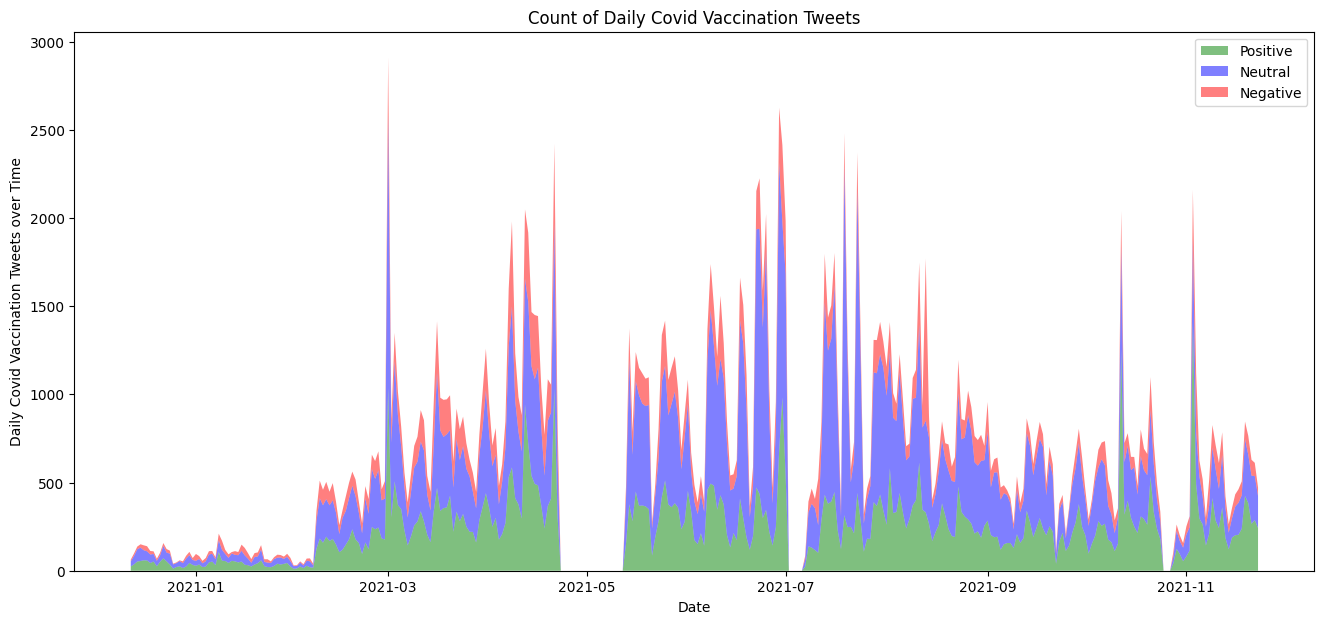

In [ ]:
# Create stacked area chart
plt.figure(figsize=(16, 7))
plt.stackplot(daily_positive_tweets_count.index, daily_positive_tweets_count.values, daily_neutral_tweets_count.values, daily_negative_tweets_count.values, labels=['Positive', 'Neutral', 'Negative'], colors=['green', 'blue', 'red'], alpha=0.5)
plt.xlabel('Date')
plt.ylabel('Daily Covid Vaccination Tweets over Time')
plt.title('Count of Daily Covid Vaccination Tweets')
plt.legend()
plt.show()

In [ ]:
daily_positive_retweets_count = positive_tweets.groupby(pd.Grouper(key = 'date', freq = 'D'))['retweets'].sum()
daily_neutral_retweets_count = neutral_tweets.groupby(pd.Grouper(key = 'date', freq = 'D'))['retweets'].sum()
daily_negative_retweets_count = negative_tweets.groupby(pd.Grouper(key = 'date', freq = 'D'))['retweets'].sum()

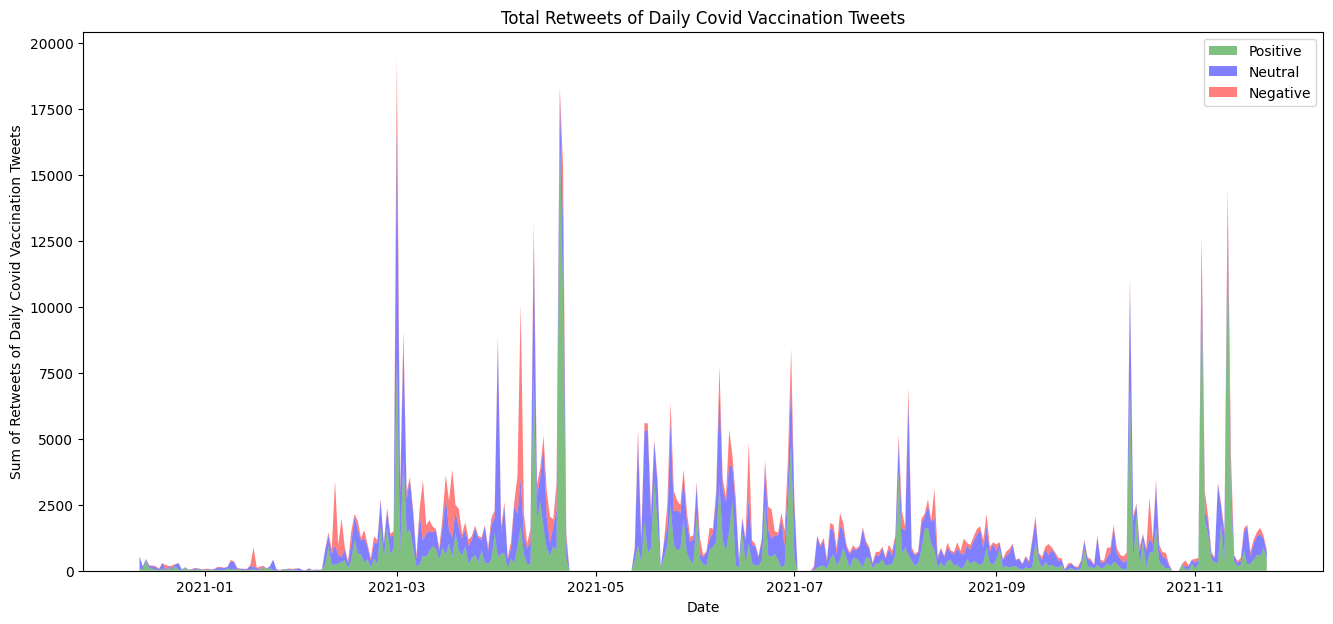

In [ ]:
# Create stacked area chart
plt.figure(figsize=(16, 7))
plt.stackplot(daily_positive_retweets_count.index, daily_positive_retweets_count.values, daily_neutral_retweets_count.values, daily_negative_retweets_count.values, labels=['Positive', 'Neutral', 'Negative'], colors=['green', 'blue', 'red'], alpha=0.5)
plt.xlabel('Date')
plt.ylabel('Sum of Retweets of Daily Covid Vaccination Tweets')
plt.title('Total Retweets of Daily Covid Vaccination Tweets')
plt.legend()
plt.show()

In [128]:
covid_data['tweet_engagement'] = covid_data['retweets'] + 1

In [132]:
print(f"Volume of positive COVID-19 vaccination Twitter activity: {positive_tweets['tweet_engagement'].sum()}")
print(f"Volume of neutral COVID-19 vaccination Twitter activity: {neutral_tweets['tweet_engagement'].sum()}")
print(f"Volume of negative COVID-19 vaccination Twitter activity: {negative_tweets['tweet_engagement'].sum()}")

Volume of positive COVID-19 vaccination Twitter activity: 318241
Volume of neutral COVID-19 vaccination Twitter activity: 353445
Volume of negative COVID-19 vaccination Twitter activity: 124591


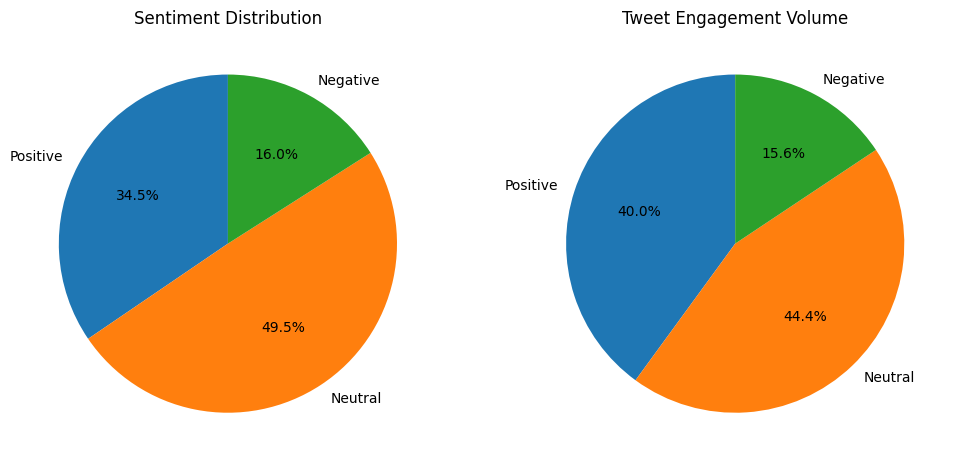

In [139]:
import matplotlib.pyplot as plt

# Data
sentiment_counts = {'Positive': 78759, 'Neutral': 112980, 'Negative': 36466}
tweet_engagement_volume = {'Positive': 318241, 'Neutral': 353445, 'Negative': 124591}

# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Pie chart for sentiment distribution
axs[0].pie(sentiment_counts.values(), labels=sentiment_counts.keys(), autopct='%1.1f%%', startangle=90)
axs[0].set_title('Sentiment Distribution')

# Pie chart for tweet engagement volume
axs[1].pie(tweet_engagement_volume.values(), labels=tweet_engagement_volume.keys(), autopct='%1.1f%%', startangle=90)
axs[1].set_title('Tweet Engagement Volume')

# Show the plot
plt.show()


In [133]:
print(f"Retweet probability of positive COVID-19 vaccination tweets: {positive_tweets['retweets'].sum() / positive_tweets['text'].count()}")
print(f"Retweet probability of neutral COVID-19 vaccination tweets: {neutral_tweets['retweets'].sum() / neutral_tweets['text'].count()}")
print(f"Retweet probability of negative COVID-19 vaccination tweets: {negative_tweets['retweets'].sum() / negative_tweets['text'].count()}")

Retweet probability of positive COVID-19 vaccination tweets: 3.0406937619827574
Retweet probability of neutral COVID-19 vaccination tweets: 2.1283855549654804
Retweet probability of negative COVID-19 vaccination tweets: 2.4166346733943946


In [135]:
from scipy import stats
t_statistic, p_value = stats.ttest_ind(positive_tweets['retweets'], neutral_tweets['retweets'])
print("T-statistic:", t_statistic)
print("P-value:", p_value)

T-statistic: 3.747568787118076
P-value: 0.0001786091977282404


In [136]:
t_statistic, p_value = stats.ttest_ind(positive_tweets['retweets'], negative_tweets['retweets'])
print("T-statistic:", t_statistic)
print("P-value:", p_value)

T-statistic: 1.5442287532934889
P-value: 0.12253567178717563


In [137]:
t_statistic, p_value = stats.ttest_ind(negative_tweets['retweets'], neutral_tweets['retweets'])
print("T-statistic:", t_statistic)
print("P-value:", p_value)

T-statistic: 1.3269673760538314
P-value: 0.18452150214903187


In [ ]:
# Use a context manager to temporarily change the display option
with pd.option_context('display.max_colwidth', None):
  print('The top 6 of most retweeted Tweets:')
  print(covid_data.loc[covid_data.retweets > 4000, ['user_name', 'user_location', 'retweets', 'text']].sort_values(by ='retweets', ascending=False ))

The top 6 of most retweeted Tweets:
             user_name     user_location  retweets  \
221427       Sputnik V   Moscow, Russia      12294   
68358        Sputnik V   Moscow, Russia      11288   
46053   hotvickkrishna     Manhattan, NY      7695   
54674    BharatBiotech  Hyderabad, India      6018   
66822             ICMR         New Delhi      4851   
68306        Sputnik V   Moscow, Russia       4105   

                                                                                                                                                text  
221427  This video fits the last almost 2 years into 2 minutes. At #SputnikV we strongly believe that it is only through Va… https://t.co/Ggi7X5qO8x  
68358   RDIF, Laboratorios Richmond launched production of #SputnikV in Argentina, the first country in Latin America to ma… https://t.co/oEMaUwVR92  
46053             Why we need Two Doses of mRNA Vaccine 💉 #vaccines #COVID19 #Pfizer #moderna #VaccinesSaveLives #vaccinated https:/

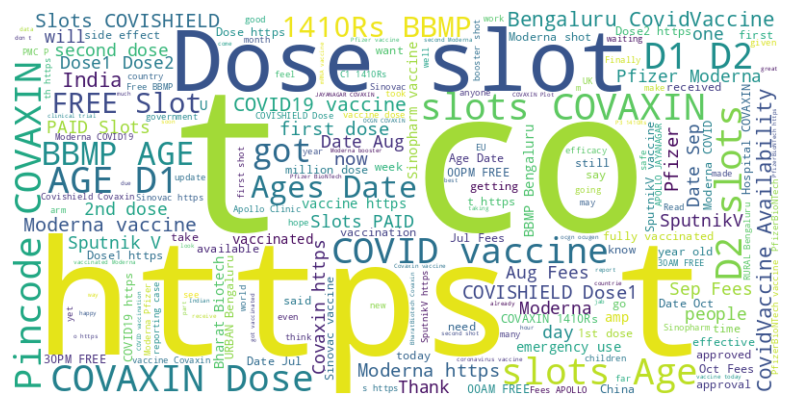

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt


# Concatenate all tweets into a single text string
text = ' '.join(tweet for tweet in covid_data['text'])
# text = cleaning_data(text)

# Create the word cloud object
wordcloud = WordCloud(width = 800, height = 400, background_color ='white').generate(text)

# Display the generated word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


In [ ]:
hashtags_list = []
for hashtags in covid_data.loc[covid_data.hashtags.notnull(), 'hashtags']:
  hashtags_list.extend(eval(hashtags.lower()))
print(len(hashtags_list))

418944


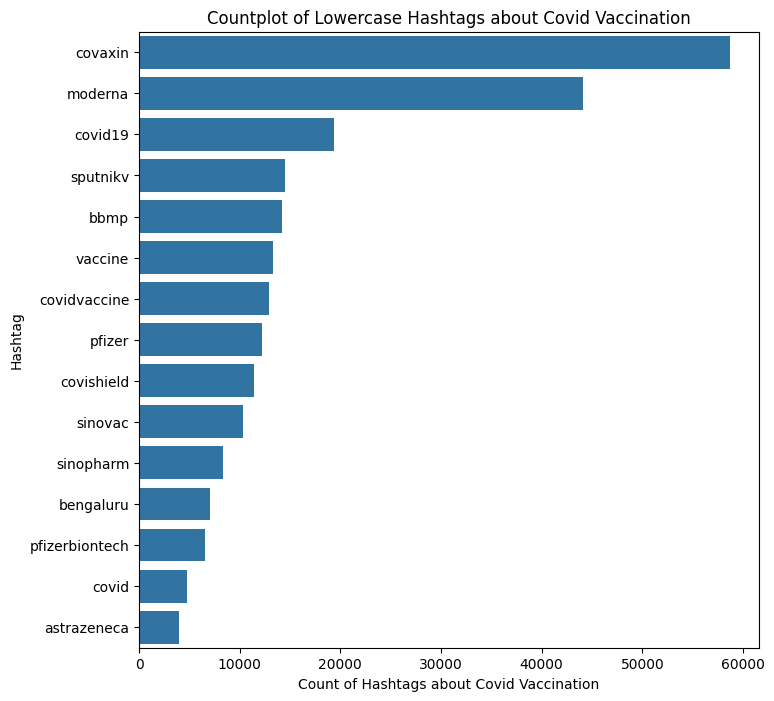

In [ ]:
top_counts = pd.Series(hashtags_list).value_counts().nlargest(100)

plt.figure(figsize=(8, 8))
sns.countplot(y=hashtags_list, order=top_counts.index[0 : 15])

# Set the title, x-label, and y-label
plt.title('Countplot of Lowercase Hashtags about Covid Vaccination')
plt.xlabel('Count of Hashtags about Covid Vaccination')
plt.ylabel('Hashtag')

# Show the plot
plt.show()

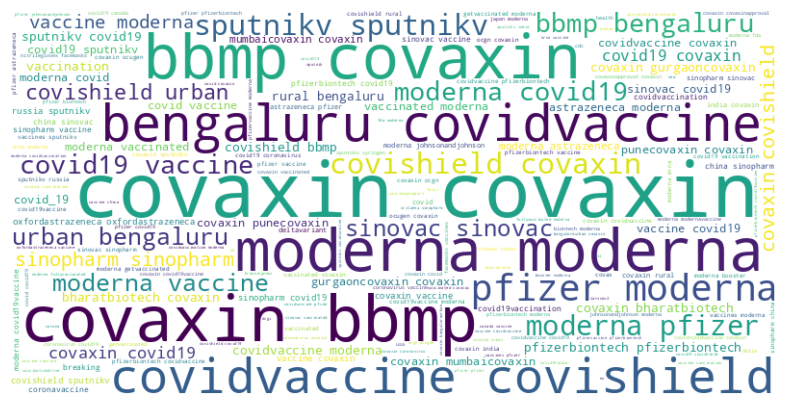

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from itertools import chain


# Filling null values with empty values
covid_data_copy['hashtags'].fillna('', inplace=True)
# Making the list of the all hashtags
list_of_hashtags = covid_data_copy['hashtags'].tolist()
# Cleaning the hashtags
clean_hashtags = cleaning_data(list_of_hashtags)
flat_list = list(chain.from_iterable(clean_hashtags))

# Concatenate all hashtags into a single text string
text = ' '.join(flat_list)

# Create the word cloud object
wordcloud = WordCloud(width = 800, height = 400, background_color ='white').generate(text)

# Display the generated word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
covid_data.loc[covid_data.user_name == 'CowinBangalore', 'user_location'] = covid_data.loc[covid_data.user_name == 'CowinBangalore', 'user_location'].fillna('Bengaluru, India')

In [ ]:
covid_data['user_location'] = covid_data['user_location'].replace(['Earth', 'World', 'Planet Earth', 'Global'], 'Planet Earth/World')

covid_data['user_location'] = covid_data['user_location'].replace(['India'], 'India (unspecified)')
covid_data['user_location'] = covid_data['user_location'].replace(['New Delhi', 'Delhi', 'New Delhi, Delhi', 'New Delhi, India', 'Delhi, India'], 'New Delhi/Delhi, India')
covid_data['user_location'] = covid_data['user_location'].replace(['Mumbai'], 'Mumbai, India')
covid_data['user_location'] = covid_data['user_location'].replace(['Hyderabad'], 'Hyderabad, India')
covid_data['user_location'] = covid_data['user_location'].replace(['Chennai'], 'Chennai, India')
covid_data['user_location'] = covid_data['user_location'].replace(['Bangalore', 'Bengaluru'], 'Bengaluru, India')

covid_data['user_location'] = covid_data['user_location'].replace(['Canada'], 'Canada (unspecified)')
covid_data['user_location'] = covid_data['user_location'].replace(['Toronto, Canada  and Worldwide', 'Toronto, Ontario', 'Toronto'], 'Toronto, Ontario, Canada')

covid_data['user_location'] = covid_data['user_location'].replace(['London'], 'London, England')
covid_data['user_location'] = covid_data['user_location'].replace(['United Kingdom', 'UK'], 'United Kingdom (unspecified)')

covid_data['user_location'] = covid_data['user_location'].replace(['Beijing', 'Beijing, China '], 'Beijing, China')

covid_data['user_location'] = covid_data['user_location'].replace(['Estados Unidos', 'United States', 'USA'], 'USA (unspecified)')
covid_data['user_location'] = covid_data['user_location'].replace(['New York, NY', 'New York'], 'New York, USA')
covid_data['user_location'] = covid_data['user_location'].replace(['Los Angeles', 'Los Angeles, CA'], 'Los Angeles, CA, USA')
covid_data['user_location'] = covid_data['user_location'].replace(['California, United States'], 'California, USA')

covid_data['user_location'] = covid_data['user_location'].replace(['Sri Lanka'], 'Sri Lanka (unspecified)')


covid_data['user_location'] = covid_data['user_location'].replace(['Pakistan'], 'Pakistan (unspecified)')

covid_data['user_location'] = covid_data['user_location'].replace(['Philippines'], 'Republic of the Philippines')

covid_data['user_location'] = covid_data['user_location'].replace(['Moscow, Russia '], 'Moscow, Russia')

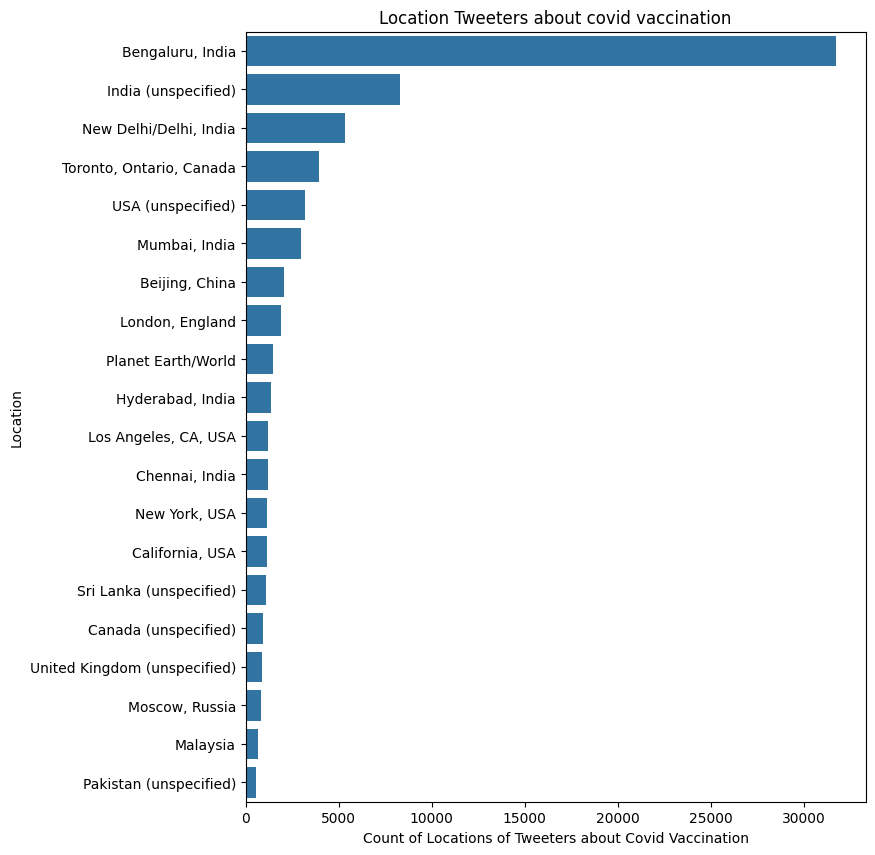

In [ ]:
user_location_counts = covid_data['user_location'].value_counts()

# Extract the categories sorted by count
order = user_location_counts.index[:20]
# print(order)
plt.figure(figsize=(8, 10))
# Create the count plot with ordered horizontal bars
sns.countplot(data=covid_data, y='user_location', order=order)

# Set the title, x-label, and y-label
plt.title('Location Tweeters about covid vaccination')
plt.xlabel('Count of Locations of Tweeters about Covid Vaccination')
plt.ylabel('Location')

# Show the plot
plt.show()

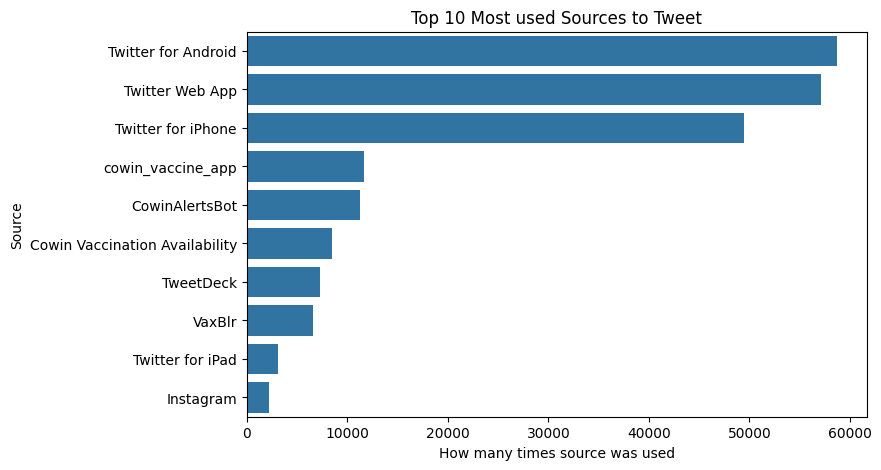

In [ ]:
source_counts = covid_data['source'].value_counts()
# Extract the categories sorted by count
order = source_counts.index[:10]

plt.figure(figsize=(8, 5))
# Create the count plot with ordered horizontal bars
sns.countplot(data=covid_data, y='source', order=order)

# Set the title, x-label, and y-label
plt.title('Top 10 Most used Sources to Tweet')
plt.xlabel('How many times source was used')
plt.ylabel('Source')

# Show the plot
plt.show()

In [ ]:
user_name_counts = covid_data['user_name'].value_counts()
# Extract the categories sorted by count
order = user_name_counts.index[:10]
print(order)

Index(['CoWIN Blore 18-44', 'CowinBangalore', 'VaxBLR', 'Owl 🦉',
       'Workout Solutions', 'Owl🦉', 'eLéPhunk', 'Xukki🌍', 'Sputnik V',
       'COVID News'],
      dtype='object', name='user_name')


In [ ]:
import plotly.express as px
from plotly.subplots import make_subplots

# Filter the dataset to include only data for the top 9 user names
top_9_user_names = ['CoWIN Blore 18-44', 'CowinBangalore', 'VaxBLR', 'Owl 🦉', 'Workout Solutions', 'Owl🦉', 'eLéPhunk', 'Xukki🌍', 'COVID News']

covid_data_top_9 = covid_data[covid_data['user_name'].isin(top_9_user_names)]

# Create the scatter plot
fig = px.scatter(covid_data_top_9, x='date', y='user_followers', size='user_friends', color='user_name',
                 size_max=30, color_discrete_sequence=px.colors.qualitative.Dark24)

# Update layout
fig.update_layout(title='Scatter Plot of how many followers and friends top 9 user has over time',
                  xaxis_title='Date',
                  yaxis_title='Number of Followers',
                  legend_title='Users',
                  width=1200, height=800)

# Show the plot
fig.show()



**REPORT**

One of the first things that we found out was that an unusual number of tweets in our dataset were tweeted by users that created their Twitter account in May, June and July 2021.

We wanted to find out more about this anomaly and looked at the most active tweeters in our dataset. We found that the four most active tweeters about COVID-19 vaccination were healthcare providers in India, especially in the city of Bengaluru, that used Twitter to send updates about available time slots for COVID-19 vaccination. This also applied to the sixth most active tweeter. All these very active Twitter accounts were created in May and June 2021, explaining the high occurrence of these months in the column ‘user_created’. Not surprisingly, later we found out that the locations of the tweeters that were most common in the dataset were Bengaluru or other locations in India, although Toronto, Canada also had a high count.

We aimed to discern whether the majority of tweets originated from individuals or organizations. Our approach involved conducting vectorization analysis using TF-IDF, followed by applying K-means to categorize usernames and user descriptions into clusters. Initially, we conducted the analysis without data cleaning, resulting in a Silhouette Score of 0.025. After implementing data cleaning techniques, the score improved to 0.067. Despite these enhancements, the score remained relatively low, indicating unreliability in the data. Subsequently, we explored alternative methods.

In an attempt to refine our analysis, we employed Named Entity Recognition (NER) tagging on cleaned usernames. However, not all usernames were successfully tagged. Consequently, we divided the untagged usernames into testing data, while utilizing the remaining null values as training data for an SVM algorithm. Interestingly, this approach yielded contrasting results to our previous findings with K-means. Our SVM model indicated a prevalence of tweets originating from organizations rather than individuals. Notably, among the top 10 most popular users, 8 were organizations. While the SVM results appeared to align more closely with reality, there's still room for improvement in accuracy.

We wanted to see if the creation of very active Twitter account by health providers in India led to a stark increase in tweets from these months, but we could not find it in our data. We did find something else, namely an interruption in the data collection around the beginning of May, and also in July and in October.

We found a correlation of 0.65 between number of tweets and the sum of their retweets. On days where there were more tweets, those tweets on average also had a lot of retweets. Later we found out that a minority of tweets that had a lot of retweets must have been responsible for this.

With VADER sentiment analyser we classified the tweets as positive, neutral and negative. We found that around half of the tweets was neutral, a bit more than a third was positive, and the remaining 16% was negative.

We plotted this over the time period and later we did the same with the number of retweets. It led to the hypothesis that the positive tweets may have been retweeted more than neutral tweets. We checked if this was the case and it really was. Positive tweets were retweeted on average 3.04 times where neutral tweets were retweeted on average 2.13 time. A t-test showed that this difference in number of retweets between positive and neutral tweets was significant, with a p-value of 0.0002.